# Exploring Pitchfork Reviews

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
import datetime
import seaborn as sns
sns.set_style('whitegrid')

# Load data

In [2]:
conn = sqlite3.connect('../database.sqlite')

![schema](images/pitchfork_reviews2.png)

In [3]:
q = '''
SELECT 
    reviewid, 
    g.genre, 
    a.artist, 
    y.year, 
    l.label,
    r.title, 
    r.score 
FROM genres AS g
JOIN artists AS a
    USING (reviewid)
JOIN years AS y
    USING (reviewid)
JOIN labels AS l
    USING (reviewid)
JOIN reviews AS r
    USING (reviewid)
;
'''

df = pd.read_sql(q, conn)

In [4]:
conn.close()

In [5]:
df

,reviewid,genre,artist,year,label,title,score
0,22703,electronic,massive attack,1998.0,virgin,mezzanine,9.3
1,22721,metal,krallice,2016.0,hathenter,prelapsarian,7.9
2,22659,rock,uranium club,2016.0,fashionable idiots,all of them naturals,7.3
3,22659,rock,uranium club,2016.0,static shock,all of them naturals,7.3
4,22661,rock,kleenex,2016.0,kill rock stars,first songs,9.0
...,...,...,...,...,...,...,...
26897,5376,rock,mojave 3,NaN,4ad,out of tune,6.3
26898,2413,rock,don caballero,1999.0,touch and go,"singles breaking up, vol. 1",7.2
26899,2413,metal,don caballero,1999.0,touch and go,"singles breaking up, vol. 1",7.2
26900,2413,experimental,don caballero,1999.0,touch and go,"singles breaking up, vol. 1",7.2


In [6]:
df.to_csv('sql_data.csv', index= False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26902 entries, 0 to 26901
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviewid  26902 non-null  int64  
 1   genre     24184 non-null  object 
 2   artist    26902 non-null  object 
 3   year      26291 non-null  float64
 4   label     26857 non-null  object 
 5   title     26902 non-null  object 
 6   score     26902 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.genre.unique()

array(['electronic', 'metal', 'rock', None, 'rap', 'experimental',
       'pop/r&b', 'folk/country', 'jazz', 'global'], dtype=object)

In [9]:
df.artist.nunique()

8633

In [10]:
df.artist.value_counts().head(10)

various artists       834
xasthur                70
prince                 42
xiu xiu                42
brian eno              40
saint etienne          40
animal collective      38
deerhoof               36
the beatles            35
the blood brothers     34
Name: artist, dtype: int64

In [11]:
df.label.value_counts().head(10)

self-released    526
sub pop          347
thrill jockey    343
drag city        332
domino           293
merge            285
mute             264
columbia         259
warp             252
matador          239
Name: label, dtype: int64

In [12]:
df.genre.value_counts().head(10)

rock            11104
electronic       4484
experimental     2228
rap              1973
pop/r&b          1712
metal            1011
folk/country      802
jazz              561
global            309
Name: genre, dtype: int64

In [13]:
df.year.value_counts().head(10)

2006.0    1854
2007.0    1809
2010.0    1745
2011.0    1735
2005.0    1693
2008.0    1683
2012.0    1624
2016.0    1582
2013.0    1578
2009.0    1560
Name: year, dtype: int64

In [14]:
df.isna().sum()

reviewid       0
genre       2718
artist         0
year         611
label         45
title          0
score          0
dtype: int64

# Potential questions to answer:
Do review scores for individual artists generally improve over time, or go down?
How has Pitchfork's review genre selection changed over time?
Who are the most highly rated artists? The least highly rated artists?

In [15]:
df[df.duplicated('reviewid', keep= False)].sort_values('reviewid')

,reviewid,genre,artist,year,label,title,score
26038,12,metal,abilene,2001.0,slowdime,abilene,7.0
26037,12,rock,abilene,2001.0,slowdime,abilene,7.0
23281,15,rock,aceyalone,2003.0,deconstruction,love & hate,6.7
23282,15,rap,aceyalone,2003.0,deconstruction,love & hate,6.7
23757,16,rap,aceyalone,2003.0,project blowed,hip hop and the world we live in,7.5
...,...,...,...,...,...,...,...
23,22719,rap,chance the rapper,2016.0,self-released,merry christmas lil mama,8.1
26,22719,pop/r&b,jeremih,2016.0,self-released,merry christmas lil mama,8.1
25,22719,pop/r&b,chance the rapper,2016.0,self-released,merry christmas lil mama,8.1
18,22720,rap,yasiin bey,2016.0,awge,december 99th,3.5


In [16]:
dup_len = len(df[df.duplicated('reviewid', keep= False)].sort_values('reviewid'))
print('Number of Duplicated Review IDs:', dup_len)

Number of Duplicated Review IDs: 14373
Percent of Duplicated Review IDs: 0.5342725447922088


It looks like a song may have multiple genres or multiple artists and that causes the data to be duplicated. We will analyze the genres first, then drop the duplicates.

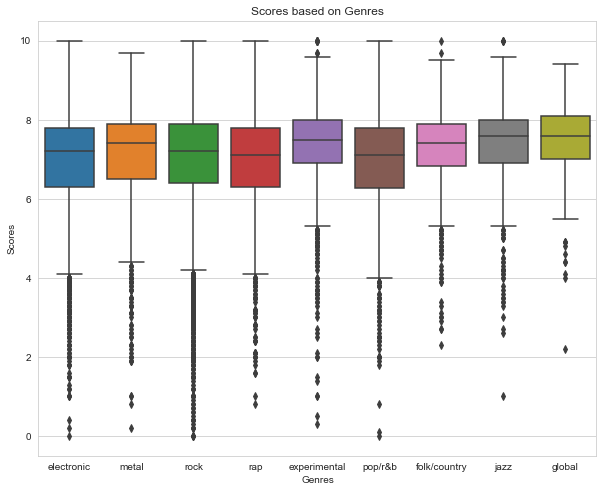

In [17]:
plt.figure(figsize= (10, 8))
sns.boxplot(x= 'genre', y= 'score', data= df)
plt.title('Scores based on Genres')
plt.xlabel('Genres')
plt.ylabel('Scores');

In [18]:
df.groupby('genre')['score'].mean()

genre
electronic      6.937868
experimental    7.368402
folk/country    7.228803
global          7.402913
jazz            7.353298
metal           6.993966
pop/r&b         6.940596
rap             6.904612
rock            6.994317
Name: score, dtype: float64

The "global" genre has the highest average score, followed closely by "experimental" and "jazz".

If you are like me and do not know what the "global" genre is, here is Wikipedia's definition to help out:
"World music is a musical category encompassing many different styles of music from around the world, including traditional music, quasi-traditional music, and music where more than one cultural tradition intermingles."

However, it is important to note here that the "global" genre has the fewest data points of all the genres.

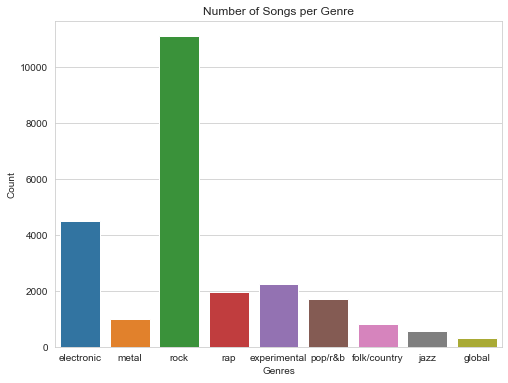

In [20]:
plt.figure(figsize= (8,6))
sns.countplot(data= df, x= 'genre')
plt.title('Number of Songs per Genre')
plt.xlabel('Genres')
plt.ylabel('Count');

Now, let's remove the duplicates and see how the genres change.

In [21]:
df2 = df.drop_duplicates('reviewid')

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 26901
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviewid  18389 non-null  int64  
 1   genre     16024 non-null  object 
 2   artist    18389 non-null  object 
 3   year      17983 non-null  float64
 4   label     18351 non-null  object 
 5   title     18389 non-null  object 
 6   score     18389 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


We lost quite a few songs there. We went from 26,902 to 18,389 entries in the dataset.

In [27]:
diff = len(df2) - dup_len 
percent_dup = diff / len(df)
print('Percent of Duplicates Removed:', percent_dup * 100)

Percent of Duplicates Removed: 14.928258122072707


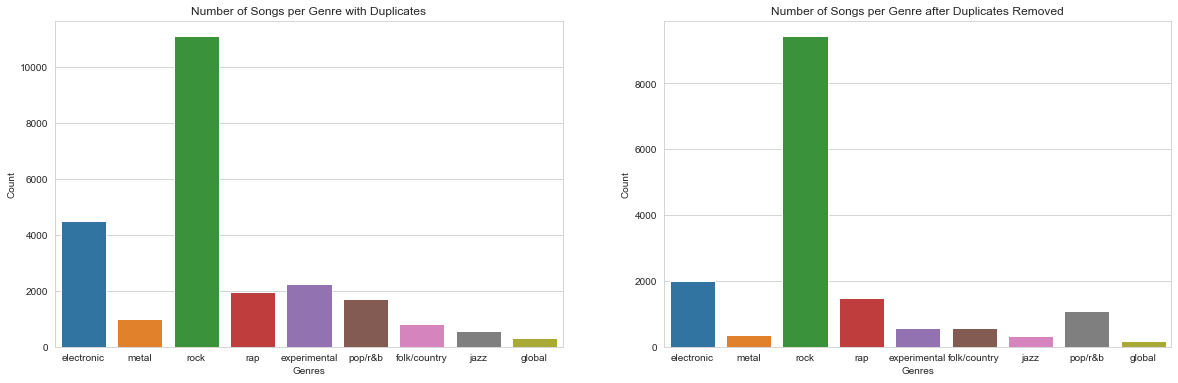

In [32]:
fig = plt.figure(figsize= (20, 6))

ax1 = fig.add_subplot(121)
sns.countplot(data= df, x= 'genre', ax= ax1)
ax1.set_title('Number of Songs per Genre with Duplicates')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(122)
sns.countplot(data= df2, x= 'genre', ax= ax2)
ax2.set_title('Number of Songs per Genre after Duplicates Removed')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Count');

In [33]:
df2.genre.value_counts()

rock            9435
electronic      1994
rap             1488
pop/r&b         1087
folk/country     574
experimental     565
metal            357
jazz             341
global           183
Name: genre, dtype: int64